<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.134104,86.823704,36.853606,85.069448,-11615.564706,-11344.683843,-1708.881626,-9635.802217
1,0.0,1.0,59.622811,87.822622,84.573356,72.117520,2825.749270,3139.885580,-1715.794452,4855.680032
2,0.0,2.0,25.386630,67.011413,21.961314,67.611051,-2634.819513,-2442.849105,-537.671729,-1905.177376
3,0.0,3.0,57.992900,21.928935,74.480415,95.289932,746.225631,1005.917812,318.731755,687.186057
4,0.0,4.0,75.055128,98.988351,71.340624,44.509855,-5259.103405,-4959.209446,-809.075977,-4150.133470
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.126723,82.495198,56.536306,79.195882,3735.854822,4030.208931,3842.243541,187.965389
59996,999.0,56.0,85.733733,72.241780,55.736286,59.601449,3719.415397,4002.728645,3642.639094,360.089551
59997,999.0,57.0,47.460157,55.659670,79.746249,27.341669,880.483386,1100.691133,949.796741,150.894392
59998,999.0,58.0,84.261872,42.346706,58.580725,82.409111,-2016.254310,-1738.655897,1111.038150,-2849.694046


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    52.134104  86.823704  36.853606  85.069448 -11615.564706   
      1.0    59.622811  87.822622  84.573356  72.117520   2825.749270   
      2.0    25.386630  67.011413  21.961314  67.611051  -2634.819513   
      3.0    57.992900  21.928935  74.480415  95.289932    746.225631   
      4.0    75.055128  98.988351  71.340624  44.509855  -5259.103405   
...                ...        ...        ...        ...           ...   
999.0 55.0   66.126723  82.495198  56.536306  79.195882   3735.854822   
      56.0   85.733733  72.241780  55.736286  59.601449   3719.415397   
      57.0   47.460157  55.659670  79.746249  27.341669    880.483386   
      58.0   84.261872  42.346706  58.580725  82.409111  -2016.254310   
      59.0   63.872913  65.935179  56.432872  92.859960   5227.231929   

                        Y        y_hat        e_hat  
rep   index                                          
0.0   0.0   -11344.683843 -1708.881626 -9635.802217  
      1.0     3139.885580 -1715.794452  4855.680032  
      2.0    -2442.849105  -537.671729 -1905.177376  
      3.0     1005.917812   318.731755   687.186057  
      4.0    -4959.209446  -809.075977 -4150.133470  
...                   ...          ...          ...  
999.0 55.0    4030.208931  3842.243541   187.965389  
      56.0    4002.728645  3642.639094   360.089551  
      57.0    1100.691133   949.796741   150.894392  
      58.0   -1738.655897  1111.038150 -2849.694046  
      59.0    5516.332853  2349.431818  3166.901035  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    52.134104  86.823704  36.853606  85.069448 -11615.564706   
      1.0    59.622811  87.822622  84.573356  72.117520   2825.749270   
      2.0    25.386630  67.011413  21.961314  67.611051  -2634.819513   
      3.0    57.992900  21.928935  74.480415  95.289932    746.225631   
      4.0    75.055128  98.988351  71.340624  44.509855  -5259.103405   
...                ...        ...        ...        ...           ...   
999.0 55.0   66.126723  82.495198  56.536306  79.195882   3735.854822   
      56.0   85.733733  72.241780  55.736286  59.601449   3719.415397   
      57.0   47.460157  55.659670  79.746249  27.341669    880.483386   
      58.0   84.261872  42.346706  58.580725  82.409111  -2016.254310   
      59.0   63.872913  65.935179  56.432872  92.859960   5227.231929   

                        Y        y_hat        e_hat  
rep   index                                          
0.0   0.0   -11344.683843 -1708.881626 -9635.802217  
      1.0     3139.885580 -1715.794452  4855.680032  
      2.0    -2442.849105  -537.671729 -1905.177376  
      3.0     1005.917812   318.731755   687.186057  
      4.0    -4959.209446  -809.075977 -4150.133470  
...                   ...          ...          ...  
999.0 55.0    4030.208931  3842.243541   187.965389  
      56.0    4002.728645  3642.639094   360.089551  
      57.0    1100.691133   949.796741   150.894392  
      58.0   -1738.655897  1111.038150 -2849.694046  
      59.0    5516.332853  2349.431818  3166.901035  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.134104,86.823704,36.853606,85.069448,-11615.564706,-11344.683843,-1708.881626,-9635.802217
1,0.0,1.0,59.622811,87.822622,84.573356,72.117520,2825.749270,3139.885580,-1715.794452,4855.680032
2,0.0,2.0,25.386630,67.011413,21.961314,67.611051,-2634.819513,-2442.849105,-537.671729,-1905.177376
3,0.0,3.0,57.992900,21.928935,74.480415,95.289932,746.225631,1005.917812,318.731755,687.186057
4,0.0,4.0,75.055128,98.988351,71.340624,44.509855,-5259.103405,-4959.209446,-809.075977,-4150.133470
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.126723,82.495198,56.536306,79.195882,3735.854822,4030.208931,3842.243541,187.965389
59996,999.0,56.0,85.733733,72.241780,55.736286,59.601449,3719.415397,4002.728645,3642.639094,360.089551
59997,999.0,57.0,47.460157,55.659670,79.746249,27.341669,880.483386,1100.691133,949.796741,150.894392
59998,999.0,58.0,84.261872,42.346706,58.580725,82.409111,-2016.254310,-1738.655897,1111.038150,-2849.694046


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    52.134104  86.823704  36.853606  85.069448 -11615.564706   
      1.0    59.622811  87.822622  84.573356  72.117520   2825.749270   
      2.0    25.386630  67.011413  21.961314  67.611051  -2634.819513   
      3.0    57.992900  21.928935  74.480415  95.289932    746.225631   
      4.0    75.055128  98.988351  71.340624  44.509855  -5259.103405   
...                ...        ...        ...        ...           ...   
999.0 55.0   66.126723  82.495198  56.536306  79.195882   3735.854822   
      56.0   85.733733  72.241780  55.736286  59.601449   3719.415397   
      57.0   47.460157  55.659670  79.746249  27.341669    880.483386   
      58.0   84.261872  42.346706  58.580725  82.409111  -2016.254310   
      59.0   63.872913  65.935179  56.432872  92.859960   5227.231929   

                        Y        y_hat        e_hat  
rep   index                                          
0.0   0.0   -11344.683843 -1708.881626 -9635.802217  
      1.0     3139.885580 -1715.794452  4855.680032  
      2.0    -2442.849105  -537.671729 -1905.177376  
      3.0     1005.917812   318.731755   687.186057  
      4.0    -4959.209446  -809.075977 -4150.133470  
...                   ...          ...          ...  
999.0 55.0    4030.208931  3842.243541   187.965389  
      56.0    4002.728645  3642.639094   360.089551  
      57.0    1100.691133   949.796741   150.894392  
      58.0   -1738.655897  1111.038150 -2849.694046  
      59.0    5516.332853  2349.431818  3166.901035  

[60000 rows x 8 columns]

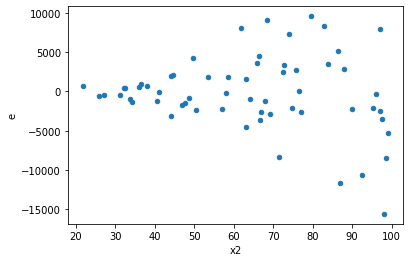

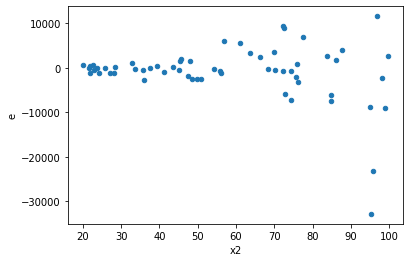

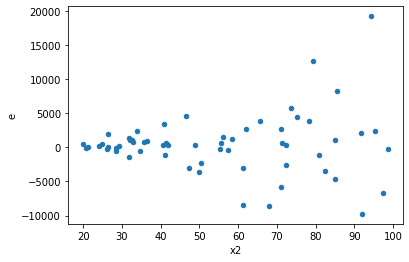

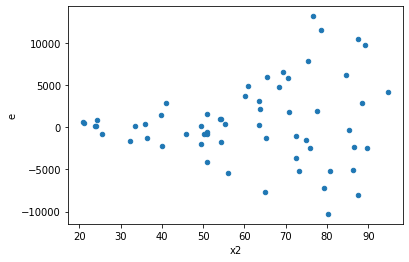

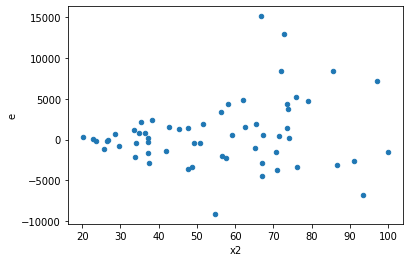

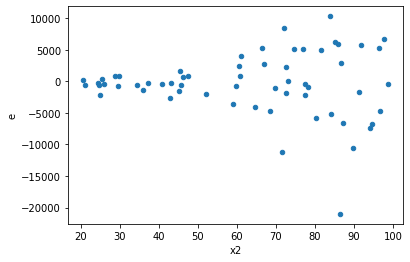

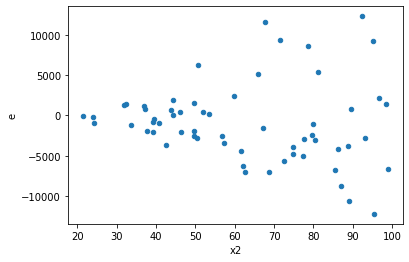

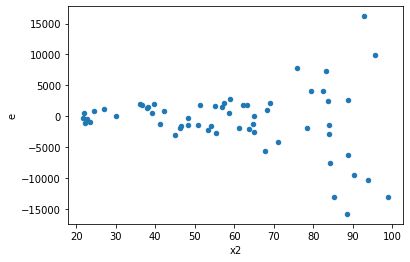

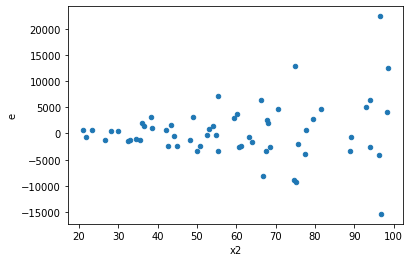

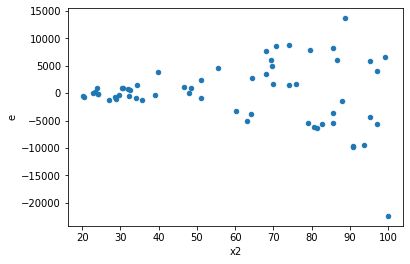

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,24.0,28.0,44697017.89274334,2087245928.6570036,1862375.7455309725,74544497.45203584,40.02656157379393,1.3322676295501878e-15,0.9999999999999993,6.661338147750939e-16,Reject001=0 : Heteroscedasticity
5.0,25.0,27.0,500793064.3328166,656308607.7953736,20031722.573312663,24307726.214643463,1.213461604496636,0.6216773865569534,0.6891613067215233,0.3108386932784767,Reject001=1 : Homoscedasticity
6.0,25.0,27.0,458618240.3174549,825331646.1080607,18344729.612698194,30567838.74474299,1.6663008607978598,0.19679111244096403,0.901604443779518,0.09839555622048202,Reject001=1 : Homoscedasticity
7.0,29.0,23.0,687543598.9910243,554347369.784165,23708399.965207733,24102059.55583326,1.0166042242919482,0.979242408306165,0.5103787958469175,0.4896212041530825,Reject001=1 : Homoscedasticity
8.0,28.0,24.0,494314101.05166966,649186122.7685282,17654075.037559632,27049421.78202201,1.5321913906264397,0.29170252944690755,0.8541487352765462,0.14585126472345378,Reject001=1 : Homoscedasticity
11.0,33.0,19.0,308307421.476655,503151401.3516267,9342649.135656212,26481652.702717196,2.834490765756149,0.01920600971315234,0.9903969951434238,0.00960300485657617,Reject001=1 : Homoscedasticity
13.0,31.0,21.0,522218873.77161247,499287874.1426712,16845770.12166492,23775613.054412916,1.4113699096389605,0.41409309503824954,0.7929534524808752,0.20704654751912477,Reject001=1 : Homoscedasticity
18.0,23.0,29.0,349850339.49758786,953441396.3251178,15210884.32598208,32877289.52845234,2.1614318289367205,0.05076182908092841,0.9746190854595358,0.025380914540464206,Reject001=1 : Homoscedasticity
20.0,29.0,23.0,203019633.93506947,907013685.1207991,7000677.032243775,39435377.61394779,5.633080548112133,6.923198754726911e-05,0.9999653840062264,3.461599377363456e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,24.0,28.0,769169353.0664418,283284993.34127855,32048723.044435073,10117321.190759948,0.3156856258120623,0.005425103258467714,Reject001=0 : Heteroscedasticity
1.0,24.0,28.0,44697017.89274334,2087245928.6570036,1862375.7455309725,74544497.45203584,40.02656157379393,1.3322676295501878e-15,Reject001=0 : Heteroscedasticity
2.0,31.0,21.0,839906568.9298222,172517095.93831062,27093760.28805878,8215099.80658622,0.3032100276685078,0.00261300145267711,Reject001=0 : Heteroscedasticity
3.0,34.0,18.0,1214477939.4003792,40760719.492837906,35719939.3941288,2264484.4162687724,0.06339552795100711,2.891450692166146e-11,Reject001=0 : Heteroscedasticity
4.0,20.0,32.0,467002428.2538626,378929234.59298396,23350121.41269313,11841538.581030749,0.5071296363621342,0.11385113689493803,Reject001=1 : Homoscedasticity
5.0,25.0,27.0,500793064.3328166,656308607.7953736,20031722.573312663,24307726.214643463,1.213461604496636,0.6216773865569534,Reject001=1 : Homoscedasticity
6.0,25.0,27.0,458618240.3174549,825331646.1080607,18344729.612698194,30567838.74474299,1.6663008607978598,0.19679111244096403,Reject001=1 : Homoscedasticity
7.0,29.0,23.0,687543598.9910243,554347369.784165,23708399.965207733,24102059.55583326,1.0166042242919482,0.979242408306165,Reject001=1 : Homoscedasticity
8.0,28.0,24.0,494314101.05166966,649186122.7685282,17654075.037559632,27049421.78202201,1.5321913906264397,0.29170252944690755,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      592
Reject001=0 : Heteroscedasticity    408
Name: Result_test, dtype: int64